# Project 05-- Anthony Micco

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [4]:
# read in csv file and create data frame
options(jupyter.rich_display = F)
myDF <- read.csv("/anvil/projects/tdm/data/election/escaped2020sample.txt", sep="|")

In [5]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=200)
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [6]:
# separates the date values in TRANSACTION_DT and creates new column called newdates
library(lubridate, warn.conflicts = FALSE)
myDF$newdates <-mdy(myDF$TRANSACTION_DT)

In [7]:
# create new column TRANSACTION_YR
library(lubridate, warn.conflicts = FALSE)
myDF$TRANSACTION_YR <-year(myDF$newdates)
head(myDF$TRANSACTION_YR)

[1] 2019 2020 2019 2019 2019 2019

In [8]:
# find the sum of the values in TRANSACTION_AMT grouped by TRANSACTION_YR
tapply(myDF$TRANSACTION_AMT, myDF$TRANSACTION_YR, sum)

     2002      2010      2015      2016      2017      2018      2019      2020 
      500       500       525      1250      2550    219497 581564250 485800503 

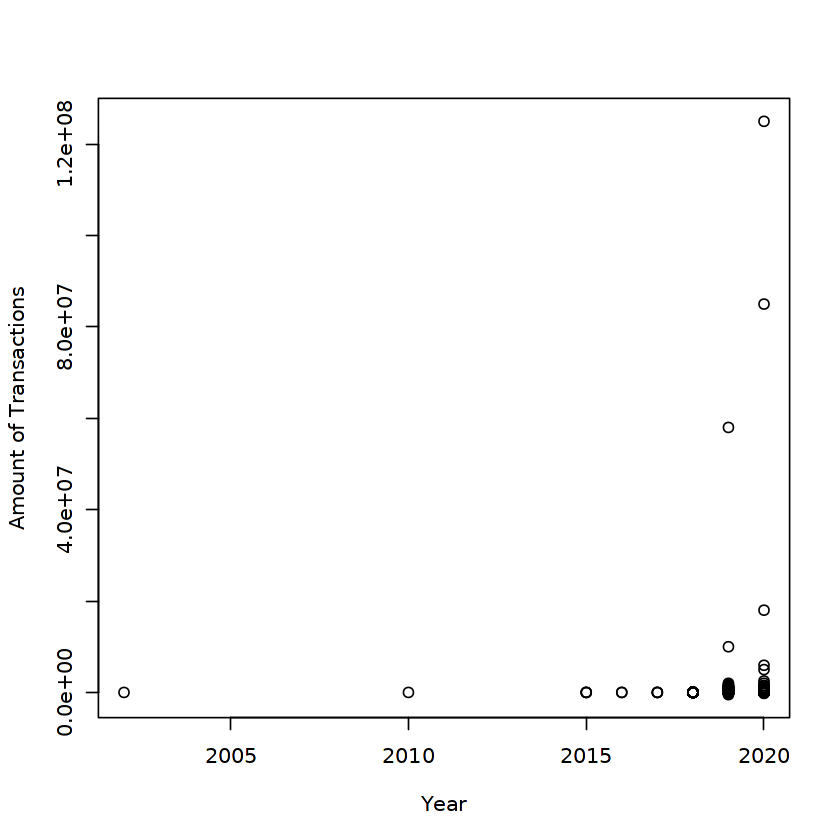

In [9]:
# plotting the amount of transcations 
plot(myDF$TRANSACTION_YR,myDF$TRANSACTION_AMT, xlab="Year",ylab="Amount of Transactions")

## Question 2

In [10]:
# creates the 2020 date frame
my2020DF <- subset(myDF, TRANSACTION_YR == "2020")
head(my2020DF)

   CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
2  C00401224 N         M4     P               2.020042e+17 24T           
9  C00523936 N         M5     P               2.020051e+17 15            
11 C00369033 N         12P    P2020           2.020022e+17 15E           
12 C00401224 N         M4     P               2.020042e+17 24T           
13 C00003418 N         M4     P               2.020042e+17 15            
14 C00696948 N         M2     P2020           2.020022e+17 15E           
   ENTITY_TP NAME                   CITY        STATE ZIP_CODE 
2  IND       MYERS, ELIZABETH       SCOTTSVILLE NY    14546    
9  IND       DICE, KEVIN            SOMERSET    NJ    088731111
11 IND       SMELLEY, KAY MS.       CYPRESS     TX    774293945
12 IND       WELLMAN, NANCY         RIVERDALE   NY    10471    
13 IND       WARD, KATHLEEN A. MRS. PALOS PARK  IL    604641414
14 IND       GIBLIN, KATHLEEN       SEATTLE     WA    981443225
   EMPLOYER             OCCUPATION

In [11]:
# sum of the transactions in each month of 2020
my2020DF$month <-month(my2020DF$newdates)
tapply(my2020DF$TRANSACTION_AMT,my2020DF$month,sum)

        1         2         3         4         5        12 
 69236956 308473457  92913000  14690773    483017      3300 

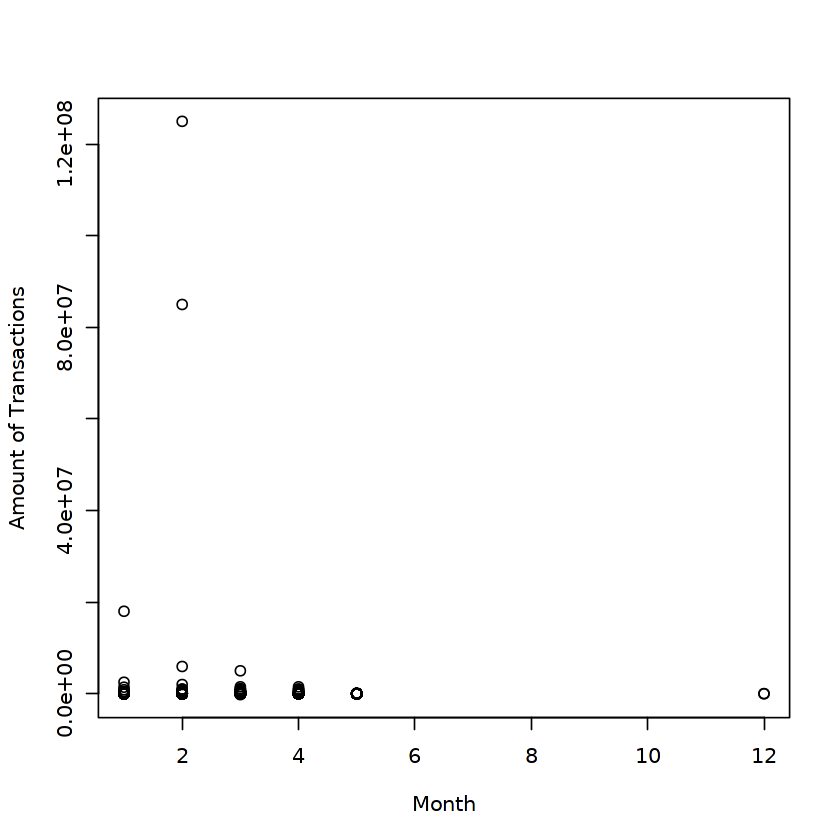

In [33]:
plot(my2020DF$month,my2020DF$TRANSACTION_AMT, xlab="Month",ylab="Amount of Transactions")

## Question 3

In [14]:
# finding the donor who gave the most money
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$NAME, sum)))

            REPUBLICAN GOVERNORS ASSOCIATION 
                                     3300000 
UNITED BROTHERHOOD OF CARPENTERS AND JOINERS 
                                     3936291 
                                  YASS, JEFF 
                                     6047000 
   EVERYTOWN FOR GUN SAFETY ACTION FUND, INC 
                                    10005656 
                                 STEYER, TOM 
                                    24796081 
                       BLOOMBERG, MICHAEL R. 
                                   275751211 

In [18]:
# finding the total amount of money given by each state
tapply(myDF$TRANSACTION_AMT,myDF$STATE,sum)

                 AA        AB        AE        AK        AL        AP        AR 
   431548     32243      1474     87137   1627993   7195054     49240   5690116 
       AS        AZ        BC        CA        CO        CT        DC        DE 
     2908  11750510     12083 151842431  18025653  12065158  37280905   2120061 
       FL        FM        GA        GU        HI        IA        ID        IL 
 44118779      2250  17026567     78087   1730014   4291247   1626126  27940911 
       IN        KS        KY        LA        MA        MB        MD        ME 
  8906170   4311170   4440149   6202190  32308431       213  14940848   3393310 
       MH        MI        MN        MO        MP        MS        MT        NB 
     5000  15933204   9990430   7123990     10098   1844410   2389091       417 
       NC        ND        NE        NH        NJ        NL        NM        NS 
 13368140   1665152   2418525   2970383  16327791       909   4137547       678 
       NT        NV        N

In [24]:
# sorting the states based on how much money they gave
sort(tapply(myDF$TRANSACTION_AMT,myDF$STATE,sum))

       SP        NT        UK        PE        SK        YT        MB        NB 
        2         9        25        50        66       162       213       417 
       NS        NL        AB        FM        AS        QC        MH        PW 
      678       909      1474      2250      2908      4347      5000      5000 
       MP        BC        ON        AA        AP        GU        VI        AE 
    10098     12083     17743     32243     49240     78087     86549     87137 
                 PR        ZZ        WV        SD        VT        ID        AK 
   431548    457693    823468   1181879   1212866   1492795   1626126   1627993 
       RI        ND        HI        MS        DE        MT        NE        NH 
  1636246   1665152   1730014   1844410   2120061   2389091   2418525   2970383 
       ME        UT        WY        NM        IA        KS        KY        OK 
  3393310   3517485   3554048   4137547   4291247   4311170   4440149   5402240 
       SC        AR        W

In [22]:
#finding the ten zipcodes that donated the most money
tail(sort(tapply(myDF$TRANSACTION_AMT,myDF$ZIP_CODE,sum)),10)

200361806 101543302     78209     20006 200012133 190041188 101634184 941040626 
  2500100   2603700   3357597   3763519   3972934   5014000  10005656  24794281 
101501101 101501060 
 64868135 210077476 

B) The five states giving the most money were Washington D.C, Florida, Texas, California, and New York 

## Question 4

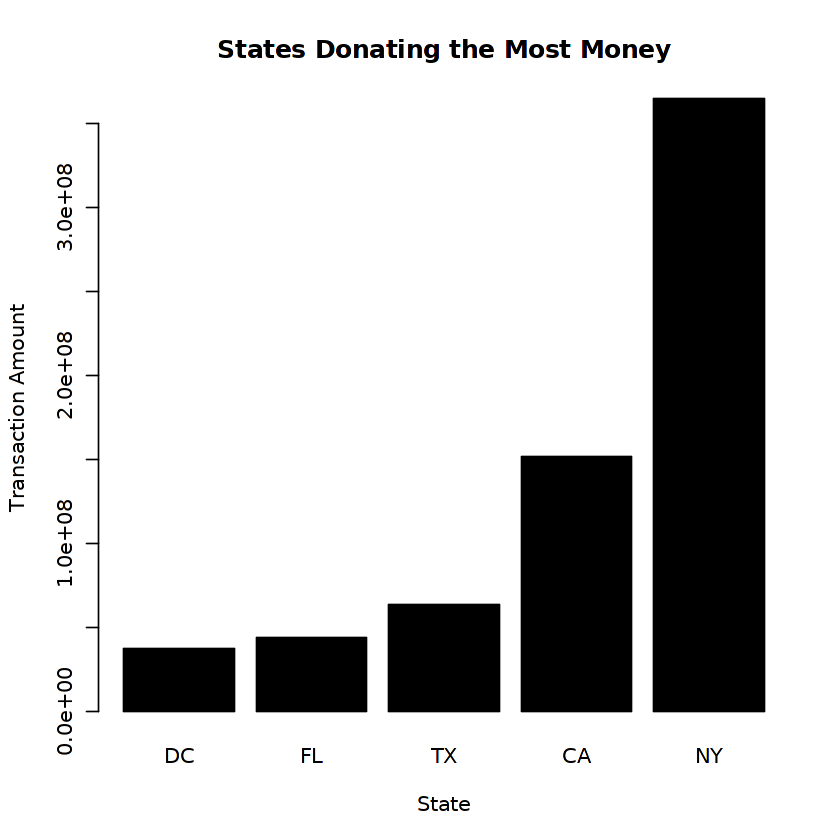

In [30]:
# using a barplot to plot the total amount of money in the top 5 states
top_states <- tail(sort(tapply(myDF$TRANSACTION_AMT,myDF$STATE,sum)),5)
barplot(top_states, main="States Donating the Most Money",xlab="State",ylab="Transaction Amount", col="black")

Warning message in dotchart(top_zip_code, main = "Zip Codes Donating the Most Money", :
"'x' is neither a vector nor a matrix: using as.numeric(x)"


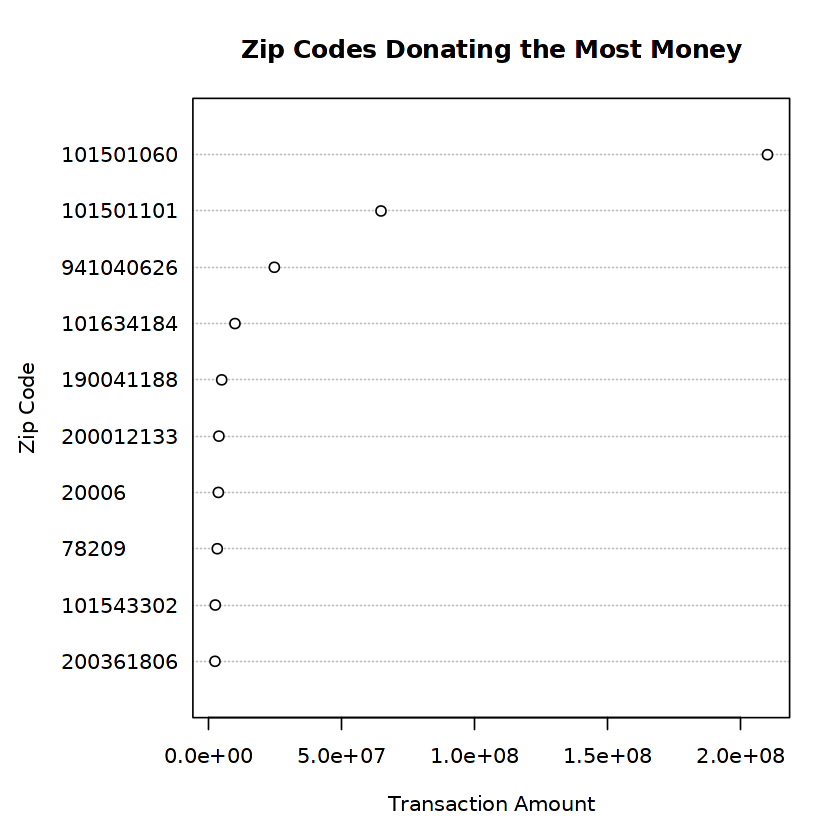

In [33]:
# using a dotplot to plot the total amount of money in the top 10 zipcodes
top_zip_code <- tail(sort(tapply(myDF$TRANSACTION_AMT,myDF$ZIP_CODE,sum)),10)
dotchart(top_zip_code, main="Zip Codes Donating the Most Money",xlab="Transaction Amount",ylab="Zip Code", col="black")

Markdown notes and sentences and analysis written here.

## Question 5

Warning message in dotchart(top_occupation_donors, main = "Occupations that Donated the Most Money", :
"'x' is neither a vector nor a matrix: using as.numeric(x)"


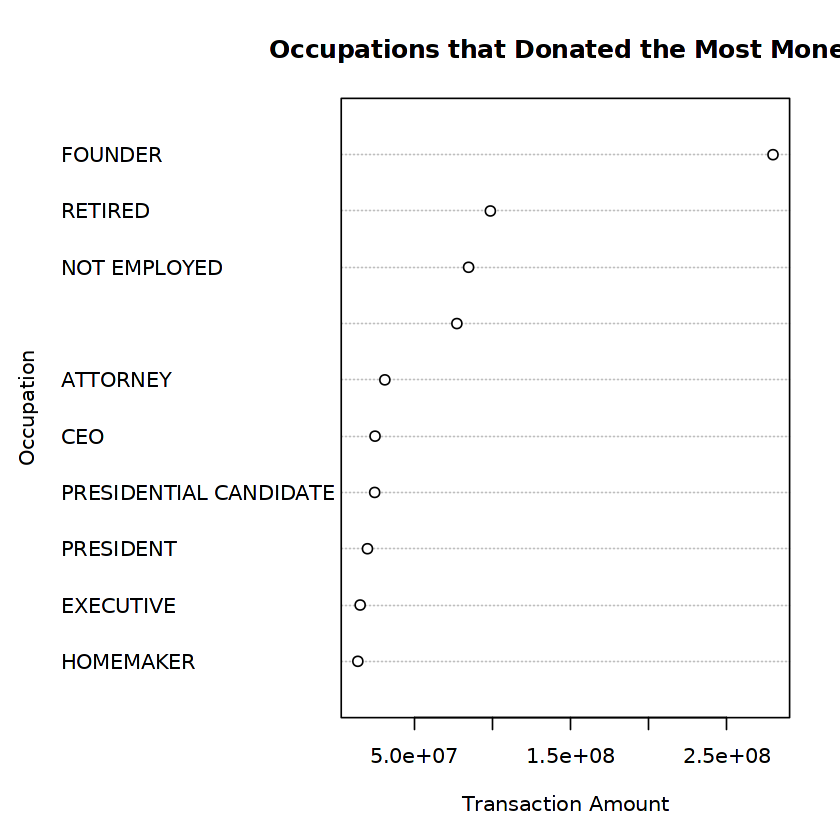

In [44]:
top_occupation_donors <- tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$OCCUPATION, sum)),10)
dotchart(top_occupation_donors, main="Occupations that Donated the Most Money",ylab="Occupation",xlab="Transaction Amount",col="black")

I thought it would be interesting to analyze which occupation donated the most money in the election cycle. To my surprise, people that were retired or unemployed were in the top 3 of most money donated. I also thought it was fairly interesting to see that Presidents and Presidential Candidates were in the top 10 because you would think that they would be receiving the donations, not providing them. Unsurprisingly, attorneys, CEOs and founders were some of the other top donors.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.